In [ ]:
# pip3 install pandas
# pip3 install pillow

In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

In [9]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 67.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [6]:
# pip install matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy import stats
import ipywidgets as widgets
from IPython.display import display
import io

In [8]:
path = "/home/sayan/jupyter/venv/Original_inputs/Normal/4.png"

In [9]:
img_main = Image.open(path)
img_array = np.asarray(img_main)
image_height = len(img_array)
image_width = len(img_array[0])
print("Image Dimension")
print(image_height, "X" ,image_width)

Image Dimension
1024 X 482


In [11]:
import numpy as np
from PIL import Image

def remove_white_to_black(img, threshold=240):
    """
    Convert white pixels (intensity > threshold) to black in grayscale image.
    Keeps the same size, no cropping.
    """
    arr = np.array(img)

    # Replace white pixels with black
    arr[arr > threshold] = 0

    return Image.fromarray(arr)

def pad_numpy_square_gray(img):
    """
    Pad grayscale image with black to make it square.
    """
    arr = np.array(img)
    h, w = arr.shape
    size = max(h, w)

    new_arr = np.zeros((size, size), dtype=np.uint8)  # black background

    y_offset = (size - h) // 2
    x_offset = (size - w) // 2

    new_arr[y_offset:y_offset+h, x_offset:x_offset+w] = arr

    return Image.fromarray(new_arr)

# Example usage
img = Image.open(path).convert("L")

# Step 1: change white pixels to black
no_white = remove_white_to_black(img, threshold=240)

# Step 2: pad to square
square_img = pad_numpy_square_gray(no_white)

# Save result
square_img.save("final_square.jpg")

In [12]:
imgsq = Image.open("final_square.jpg").convert("L")
img_array = np.asarray(imgsq)
image_height = len(img_array)
image_width = len(img_array[0])
print("Image Dimension")
print(image_height, "X" ,image_width)

Image Dimension
1024 X 1024


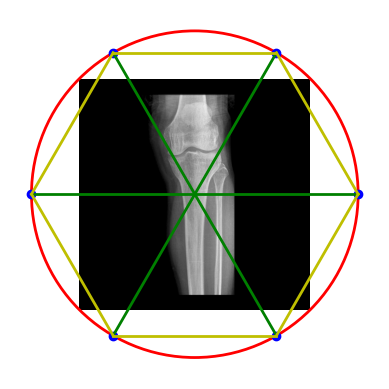

In [13]:
# Load squared grayscale image
img = Image.open("final_square.jpg").convert("L")
arr = np.array(img)

h, w = arr.shape
assert h == w, "Image must be square!"

# Center of image
cx, cy = w // 2, h // 2

# Radius = half of diagonal
radius = int(np.sqrt(2) * w / 2)

# Plot image
fig, ax = plt.subplots()
ax.imshow(arr, cmap="gray")

# Draw circle with exact radius
circle = plt.Circle((cx, cy), radius, color="red", fill=False, linewidth=2)
ax.add_patch(circle)

# Angles for 6 points (radians)
angles = np.linspace(0, 2*np.pi, 6, endpoint=False)

# Compute coordinates of the 6 points
points = [(cx + radius*np.cos(a), cy + radius*np.sin(a)) for a in angles]


# Plot the 6 points
for (x, y) in points:
    ax.plot(x, y, 'bo', markersize=6)   # blue dots

# Draw lines from center to each point
for (x, y) in points:
    ax.plot([cx, x], [cy, y], 'g-', linewidth=2)


for i in range(len(points)):
    x1, y1 = points[i]
    x2, y2 = points[(i+1) % len(points)]  # wrap around to connect last→first
    ax.plot([x1, x2], [y1, y2], 'y-', linewidth=2)  # yellow hexagon edges


# Expand axis limits so circle is visible
ax.set_xlim(0 - w*0.3, w + w*0.3)
ax.set_ylim(h + h*0.3, 0 - h*0.3)  # inverted y for image display

ax.set_aspect('equal')
plt.axis("off")
plt.show()

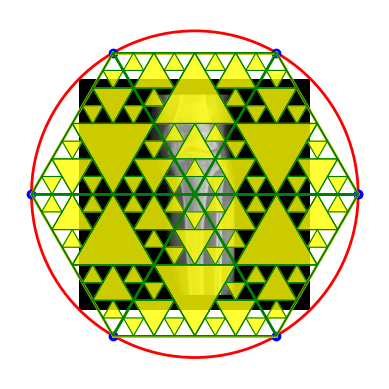

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- Sierpinski Plotting Functions (Corrected) ---
def get_midpoint(p1, p2):
    """Calculates the midpoint of a line segment."""
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def plot_sierpinski(v1, v2, v3, ax, level):
    """Recursively plots Sierpinski triangles."""
    if level == 0:
        return

    # Draw the triangle for the current level # meaning
    ax.plot([v1[0], v2[0], v3[0], v1[0]], [v1[1], v2[1], v3[1], v1[1]], color='green', linewidth=0.8)

    # Calculate midpoints
    m1 = get_midpoint(v1, v2)
    m2 = get_midpoint(v2, v3)
    m3 = get_midpoint(v1, v3)

    # Fill the central, "necessary" triangle at every level > 0
    # This is the key correction.
    ax.fill([m1[0], m2[0], m3[0],m1[0]], [m1[1], m2[1], m3[1],m1[1]], color='yellow', alpha=0.8)
    ax.plot([m1[0], m2[0], m3[0], m1[0]], [m1[1], m2[1], m3[1], m1[1]], color='green', linewidth=0.8)
    # Recursively call for the 3 outer triangles
    plot_sierpinski(v1, m1, m3, ax, level - 1)
    plot_sierpinski(m1, v2, m2, ax, level - 1)
    plot_sierpinski(m3, m2, v3, ax, level - 1)


# --- Your Original Code (Slightly modified) ---
# Load squared grayscale image
img = Image.open("final_square.jpg").convert("L")
arr = np.array(img)

h, w = arr.shape
assert h == w, "Image must be square!"

# Center of image
cx, cy = w // 2, h // 2

# Radius = half of diagonal
radius = int(np.sqrt(2) * w / 2)

# Plot image
fig, ax = plt.subplots()
ax.imshow(arr, cmap="gray")

# Draw circle with exact radius
circle = plt.Circle((cx, cy), radius, color="red", fill=False, linewidth=2)
ax.add_patch(circle)

# Angles for 6 points (radians)
angles = np.linspace(0, 2*np.pi, 7)

# Compute coordinates of the 6 points #check this code 
points = [(cx + radius*np.cos(a), cy + radius*np.sin(a)) for a in angles]


# Plot the 6 points
for (x, y) in points:
    ax.plot(x, y, 'bo', markersize=6)   # blue dots

# Draw lines from center to each point
for (x, y) in points:
    ax.plot([cx, x], [cy, y], 'g-', linewidth=2)


for i in range(len(points) - 1):
    x1, y1 = points[i]
    x2, y2 = points[(i+1) % len(points)]  # wrap around to connect last→first
    ax.plot([x1, x2], [y1, y2], 'y-', linewidth=2)  #  hexagon edges


# Expand axis limits so circle is visible
ax.set_xlim(0 - w*0.3, w + w*0.3)
ax.set_ylim(h + h*0.3, 0 - h*0.3)  # inverted y for image display

ax.set_aspect('equal')
plt.axis("off")


# --- New Loop to Plot the Sierpinski Triangles (Add this) ---
center_point = (cx, cy)
recursion_level = 3 # You can change this level to get more or fewer triangles

for i in range(len(points)):
    p1 = points[i]
    p2 = points[(i + 1) % len(points)]  

    # Call the recursive plotting function for each of the 6 main triangles
    plot_sierpinski(center_point, p1, p2, ax, recursion_level)

# Show the final plot
plt.show()

BLOCK DIVISION TREE

In [ ]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 4.9 MB/s  0:00:14m0:00:0100:01
Note: you may need to restart the kernel to use updated packages.


Enter the value of number of paritition: 


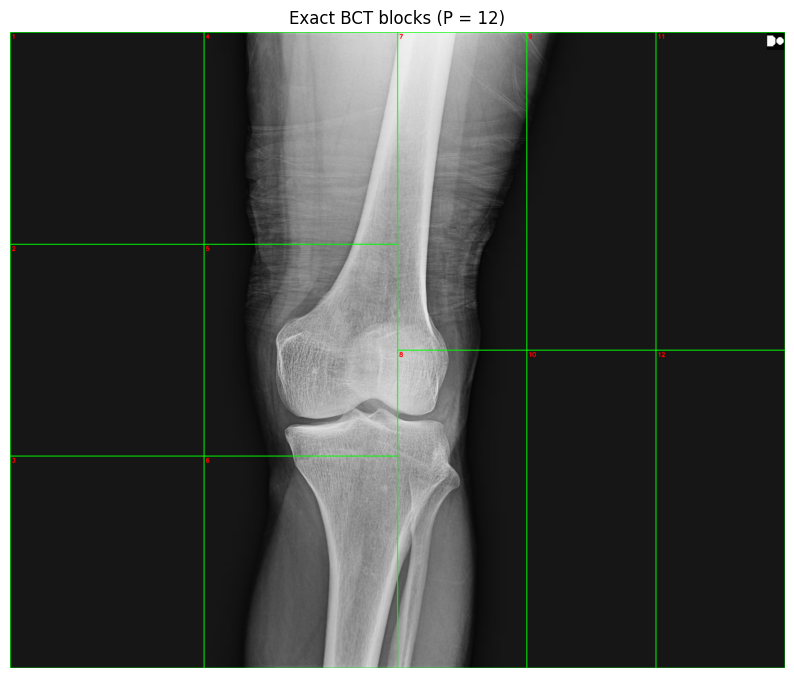

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class BCTNode:
    def __init__(self, x, y, w, h, depth=0, label=""):
        self.x, self.y, self.w, self.h = x, y, w, h
        self.depth = depth
        self.children = []
        self.label = label

def split_dim(node):
    return 'x' if node.w >= node.h else 'y'

def quantized_multi_split(node, leaf_counts, next_dim=None):
    dim = next_dim if next_dim in ('x','y') else split_dim(node)
    total_leaves = sum(leaf_counts)
    total_len = node.w if dim == 'x' else node.h
    cum_fracs = np.cumsum([lc / total_leaves for lc in leaf_counts[:-1]])
    cuts = [int(round(f * total_len)) for f in cum_fracs]

    children = []
    start = 0
    segments = cuts + [total_len]
    for i, end in enumerate(segments):
        if dim == 'x':
            w_i = end - start
            children.append(BCTNode(node.x + start, node.y, w_i, node.h, node.depth + 1))
        else:
            h_i = end - start
            children.append(BCTNode(node.x, node.y + start, node.w, h_i, node.depth + 1))
        start = end

    node.children = children
    return children

def refine_children_y(children, leaf_counts):
    leaves = []
    for child, cnt in zip(children, leaf_counts):
        if cnt == 1:
            leaves.append(child)
        else:
            parts = quantized_multi_split(child, [1]*cnt, next_dim='y')
            leaves.extend(parts)
    return leaves

# ✅ Exact top-down refinement patterns from the paper's figure
PATTERN_MAP = {
    1:  {'root_fanout': 1, 'root_leaf_counts': [1]},               # Root only
    2:  {'root_fanout': 2, 'root_leaf_counts': [1, 1]},            # Root splits into 2
    3:  {'root_fanout': 2, 'root_leaf_counts': [1,1, 1]},            # Left child refined
    4:  {'root_fanout': 2, 'root_leaf_counts': [2,1,1]},            # Both children refined
    5:  {'root_fanout': 3, 'root_leaf_counts': [2, 2, 1]},         # Third child unrefined
    6:  {'root_fanout': 3, 'root_leaf_counts': [2, 2, 2]},         # All refined
    7:  {'root_fanout': 4, 'root_leaf_counts': [2, 2, 2, 1]},      # Fourth child unrefined
    8:  {'root_fanout': 4, 'root_leaf_counts': [2, 2, 2, 2]},      # All refined
    9:  {'root_fanout': 4, 'root_leaf_counts': [2, 2, 2, 2,1]},      # First child refined deeper
    10: {'root_fanout': 4, 'root_leaf_counts': [2, 2, 2, 2,2]},      # First two refined deeper
    11: {'root_fanout': 4, 'root_leaf_counts': [3, 2, 2, 2]},      # Third refined deeper
    12: {'root_fanout': 4, 'root_leaf_counts': [3, 3, 2, 2,2]},      # All refined equally
    13: {'root_fanout': 5, 'root_leaf_counts': [3, 3, 3, 3, 1]},   # Fifth child unrefined
    14: {'root_fanout': 5, 'root_leaf_counts': [3, 3, 3, 3, 2]},   # Fifth refined once
    15: {'root_fanout': 5, 'root_leaf_counts': [3, 3, 3, 3, 3]},   # All refined equally
}
def extend_pattern_top_down(P):
    # Start from P = 15 baseline
    fanout = 5
    leaf_counts = [3] * fanout
    current_P = sum(leaf_counts)

    while current_P < P:
        min_index = leaf_counts.index(min(leaf_counts))
        leaf_counts[min_index] += 1
        current_P += 1

    return fanout, leaf_counts

def build_bct_exact(image_shape, P, force_root_dim='x'):
    h, w = image_shape
    root = BCTNode(0, 0, w, h, depth=0, label='Root')

    if P in PATTERN_MAP:
        leaf_counts = PATTERN_MAP[P]['root_leaf_counts']
    elif P > 15:
        _, leaf_counts = extend_pattern_top_down(P)
    else:
        raise ValueError(f"P={P} not defined and cannot be extended.")

    root_children = quantized_multi_split(root, leaf_counts, next_dim=force_root_dim)
    leaf_nodes = refine_children_y(root_children, leaf_counts)
    return leaf_nodes

def draw_bct(image, nodes, P):
    out = image.copy()
    for i, n in enumerate(nodes):
        cv2.rectangle(out, (n.x, n.y), (n.x + n.w, n.y + n.h), (0, 255, 0), 2)
        cv2.putText(out, f"{i+1}", (n.x + 5, n.y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)
    rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(rgb)
    plt.title(f"Exact BCT blocks (P = {P})")
    plt.axis('off')
    plt.show()

def partition_image_exact(image_path, P, force_root_dim='x'):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unreadable.")
    h, w = img.shape[:2]
    leaves = build_bct_exact((h, w), P, force_root_dim=force_root_dim)
    draw_bct(img, leaves, P)

# ✅ Example usage
P = int(input(print("Enter the value of number of paritition: ")))
partition_image_exact("dataset/Normal/N22.jpg", P, force_root_dim='x')

In [9]:
pip install tdqm # type: ignore

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'tdqm' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'tdqm'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1380 sha256=2346b9d37345c2f8461cd6bd9999c38a5f261375264affb03fa17f9ebd68bfae
  Stored in directory: /home/sayan/.cache/pip/wheels/37/31/b8/7b711038035720ba0df14376af06e5e76b9bd61759c861ad92
Successfully built tdqm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [tdqm]
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
from scipy import stats
from functools import lru_cache
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm # ADDED: For a helpful progress bar


def safe_moments(arr):
    if len(arr) < 2 or np.std(arr) < 1e-8:  # Too few values or almost constant
        return {"skewness": 0.0, "kurtosis": 0.0}
    return {
        "skewness": float(stats.skew(arr)),
        "kurtosis": float(stats.kurtosis(arr))
    }

# --- Configuration ---
RESIZE_DIM = (512, 512) # ADDED: Define a standard size for all images

# --- Helper Functions ---

def remove_white_to_black(img, threshold=240):
    """Replace white (>=threshold) with black in grayscale image."""
    arr = np.array(img)
    arr[arr >= threshold] = 0
    return Image.fromarray(arr)

def pad_numpy_square_gray(img):
    """Pad grayscale image with black to make it square."""
    arr = np.array(img)
    h, w = arr.shape
    size = max(h, w)
    new_arr = np.zeros((size, size), dtype=np.uint8)
    y_offset = (size - h) // 2
    x_offset = (size - w) // 2
    new_arr[y_offset:y_offset+h, x_offset:x_offset+w] = arr
    return Image.fromarray(new_arr)

def get_midpoint(p1, p2):
    """Calculates the midpoint between two points."""
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def generate_sierpinski_triangles(v1, v2, v3, level):
    """
    Recursively generates the vertices of the 'hole' triangles.
    This function is a generator that yields the coordinates.
    """
    if level <= 0:
        return

    m1 = get_midpoint(v1, v2)
    m2 = get_midpoint(v2, v3)
    m3 = get_midpoint(v1, v3)

    yield (m1, m2, m3)

    yield from generate_sierpinski_triangles(v1, m1, m3, level - 1)
    yield from generate_sierpinski_triangles(m1, v2, m2, level - 1)
    yield from generate_sierpinski_triangles(m3, m2, v3, level - 1)


# --- Caching and Processing Functions ---
def extract_features(sub_triangle_pixels):
    """Compute stats from pixels."""
    nonzero_pixels = sub_triangle_pixels[sub_triangle_pixels > 0]
    if nonzero_pixels.size < 2:
        return {
            "mean": 0,
            "median": 0,
            "std_dev": 0,
            "skewness": np.nan,
            "kurtosis": np.nan
        }

    nonzero_pixels = nonzero_pixels.astype(np.float64)

    # Use safe moments
    moments = safe_moments(nonzero_pixels)

    return {
        "mean": float(np.mean(nonzero_pixels)),
        "median": float(np.median(nonzero_pixels)),
        "std_dev": float(np.std(nonzero_pixels)),
        "skewness": moments["skewness"],
        "kurtosis": moments["kurtosis"]
    }


@lru_cache(maxsize=5)
def get_triangle_masks(w, h, recursion_level=3):
    """Precompute masks for the 'hole' triangles for a given size."""
    cx, cy = w // 2, h // 2
    # Adjust radius slightly to ensure vertices are within the image bounds
    radius = min(w, h) // 2 * 0.95
    
    # Vertices of a regular hexagon
    main_points = [
        (cx + radius * np.cos(angle), cy + radius * np.sin(angle))
        for angle in np.linspace(0, 2 * np.pi, 7)
    ]
    center_point = (cx, cy)

    all_masks = []
    for i in range(6):
        p1, p2 = main_points[i], main_points[i + 1]
        
        sierpinski_verts = list(generate_sierpinski_triangles(center_point, p1, p2, level=recursion_level))
        
        mask_set = []
        for vertices in sierpinski_verts:
            mask = Image.new("L", (w, h), 0)
            draw = ImageDraw.Draw(mask)
            # CHANGED: Simplified polygon drawing call. PIL can handle a list of tuples.
            draw.polygon(vertices, fill=1)
            mask_set.append(np.array(mask, dtype=bool))
        all_masks.append(mask_set)
    return all_masks

def process_single_image(args):
    img_path, class_label, label_map = args
    try:
        img = Image.open(img_path).convert("L")
        no_white = remove_white_to_black(img, threshold=240)
        square_img = pad_numpy_square_gray(no_white)
        
        # ADDED: Standardize image size. This is the key fix.#check this what it does
        resized_img = square_img.resize(RESIZE_DIM, Image.Resampling.LANCZOS)
        
        arr = np.array(resized_img)
        h, w = arr.shape

        # Now, w and h will be constant (e.g., 512), so the cache will be hit every time.
        masks = get_triangle_masks(w, h, recursion_level=3)
        row_features = {}

        triangle_count = 0
        for mask_set in masks:
            for mask_arr in mask_set:
                sub_triangle_pixels = arr[mask_arr]
                features = extract_features(sub_triangle_pixels)
                for fname, val in features.items():
                    if np.isnan(val) or np.isinf(val):
                        row_features[f"triangle_{triangle_count + 1}_{fname}"] = 0
                    else:
                        row_features[f"triangle_{triangle_count + 1}_{fname}"] = val
                triangle_count += 1
        
        row_features["label"] = label_map.get(class_label, -1)
        return row_features
    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
        return None # Return None on error

# --- Main Dataset Processing ---
def process_dataset_wide(root_folder, output_csv, num_workers=4):
    label_map = {"Normal": 0, "Osteoporosis": 1, "Osteopenia": 2}
    
    tasks = []
    for class_label in os.listdir(root_folder):
        class_folder = os.path.join(root_folder, class_label)
        if os.path.isdir(class_folder) and class_label in label_map:
            for img_name in os.listdir(class_folder):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_folder, img_name)
                    tasks.append((img_path, class_label, label_map))

    all_rows = []
    # Use ProcessPoolExecutor within a 'with' statement for proper cleanup
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        # ADDED: Use tqdm to show a progress bar
        futures = [executor.submit(process_single_image, task) for task in tasks]
        for f in tqdm(as_completed(futures), total=len(tasks), desc="Processing Images"):
            result = f.result()
            if result: # Check if the result is not None
                all_rows.append(result)

    if not all_rows:
        print("⚠️ No features were extracted. Check dataset path and image files.")
        return

    df = pd.DataFrame(all_rows)
    df.to_csv(output_csv, index=False)
    print(f"\n✅ Wide-format features saved to {output_csv}")

# --- Execution ---
# ADDED: Essential guard for multiprocessing
if __name__ == "__main__":
    root_folder = "dataset"
    output_csv = "triangle_features_78_stable.csv"
    # It's good practice to use os.cpu_count() or a slightly lower number
    workers = max(1, os.cpu_count() - 1 if os.cpu_count() else 1)
    process_dataset_wide(root_folder, output_csv, num_workers=workers)

Processing Images: 100%|██████████| 616/616 [00:12<00:00, 47.50it/s]



✅ Wide-format features saved to triangle_features_78_stable.csv


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [8]:
data = pd.read_csv('triangle_features_78_stable.csv')
data.head()

,triangle_1_mean,triangle_1_median,triangle_1_std_dev,triangle_1_skewness,triangle_1_kurtosis,triangle_2_mean,triangle_2_median,triangle_2_std_dev,triangle_2_skewness,triangle_2_kurtosis,...,triangle_77_median,triangle_77_std_dev,triangle_77_skewness,triangle_77_kurtosis,triangle_78_mean,triangle_78_median,triangle_78_std_dev,triangle_78_skewness,triangle_78_kurtosis,label
0,140.207851,135.0,40.265839,0.059978,0.451244,82.389688,92.0,30.105577,-0.647993,-0.590148,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,2
1,4.000000,4.0,0.000000,0.000000,0.000000,3.956235,4.0,0.204572,-4.460390,17.895083,...,4.0,0.000000,0.000000,0.000000,4.000000,4.0,0.000000,0.000000,0.00000,2
2,7.469568,7.0,2.860494,6.859441,48.713306,32.089928,25.0,26.289006,0.894554,0.087310,...,7.0,0.000000,0.000000,0.000000,7.000000,7.0,0.000000,0.000000,0.00000,2
3,13.095253,13.0,4.404259,13.635992,213.636531,43.859375,11.0,55.155980,1.273222,0.126807,...,13.0,0.000000,0.000000,0.000000,13.000000,13.0,0.000000,0.000000,0.00000,2
4,134.926202,136.0,43.221892,-0.060247,-1.166228,57.594125,51.0,19.967423,0.511852,0.006208,...,46.0,28.526613,-0.191506,-1.596096,5.980263,7.0,2.626961,-0.703637,-0.64356,2


In [16]:
data[0:5]

,triangle_1_mean,triangle_1_median,triangle_1_std_dev,triangle_1_skewness,triangle_1_kurtosis,triangle_2_mean,triangle_2_median,triangle_2_std_dev,triangle_2_skewness,triangle_2_kurtosis,...,triangle_77_median,triangle_77_std_dev,triangle_77_skewness,triangle_77_kurtosis,triangle_78_mean,triangle_78_median,triangle_78_std_dev,triangle_78_skewness,triangle_78_kurtosis,label
0,140.207851,135.0,40.265839,0.059978,0.451244,82.389688,92.0,30.105577,-0.647993,-0.590148,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,2
1,4.000000,4.0,0.000000,0.000000,0.000000,3.956235,4.0,0.204572,-4.460390,17.895083,...,4.0,0.000000,0.000000,0.000000,4.000000,4.0,0.000000,0.000000,0.00000,2
2,7.469568,7.0,2.860494,6.859441,48.713306,32.089928,25.0,26.289006,0.894554,0.087310,...,7.0,0.000000,0.000000,0.000000,7.000000,7.0,0.000000,0.000000,0.00000,2
3,13.095253,13.0,4.404259,13.635992,213.636531,43.859375,11.0,55.155980,1.273222,0.126807,...,13.0,0.000000,0.000000,0.000000,13.000000,13.0,0.000000,0.000000,0.00000,2
4,134.926202,136.0,43.221892,-0.060247,-1.166228,57.594125,51.0,19.967423,0.511852,0.006208,...,46.0,28.526613,-0.191506,-1.596096,5.980263,7.0,2.626961,-0.703637,-0.64356,2


In [19]:
triangle_cols = []
for i in range(1,79):
    triangle_cols.append(f"triangle_{i}_mean")

print(triangle_cols[:78])

['triangle_1_mean', 'triangle_2_mean', 'triangle_3_mean', 'triangle_4_mean', 'triangle_5_mean', 'triangle_6_mean', 'triangle_7_mean', 'triangle_8_mean', 'triangle_9_mean', 'triangle_10_mean', 'triangle_11_mean', 'triangle_12_mean', 'triangle_13_mean', 'triangle_14_mean', 'triangle_15_mean', 'triangle_16_mean', 'triangle_17_mean', 'triangle_18_mean', 'triangle_19_mean', 'triangle_20_mean', 'triangle_21_mean', 'triangle_22_mean', 'triangle_23_mean', 'triangle_24_mean', 'triangle_25_mean', 'triangle_26_mean', 'triangle_27_mean', 'triangle_28_mean', 'triangle_29_mean', 'triangle_30_mean', 'triangle_31_mean', 'triangle_32_mean', 'triangle_33_mean', 'triangle_34_mean', 'triangle_35_mean', 'triangle_36_mean', 'triangle_37_mean', 'triangle_38_mean', 'triangle_39_mean', 'triangle_40_mean', 'triangle_41_mean', 'triangle_42_mean', 'triangle_43_mean', 'triangle_44_mean', 'triangle_45_mean', 'triangle_46_mean', 'triangle_47_mean', 'triangle_48_mean', 'triangle_49_mean', 'triangle_50_mean', 'triangl

In [9]:
import pandas as pd

# # Read CSV
# df = pd.read_csv("triangle_features_78_stable.csv")

# # Generate triangle column names dynamically
# triangle_cols = [f"triangle_{i}_mean" for i in range(1, 79)]

# # Row-wise mean
# df["RowMean"] = df[triangle_cols].mean(axis=1)

# # Overall mean
# df["OverallMean"] = df["RowMean"].mean()

# # Save CSV (index removed)
# output_file = "triangles_updated.csv"
# df.to_csv(output_file, index=False)

# print(f"✅ File saved as: {output_file}")


In [ ]:
# data["row_median"] = data[triangle_cols].median(axis=1)

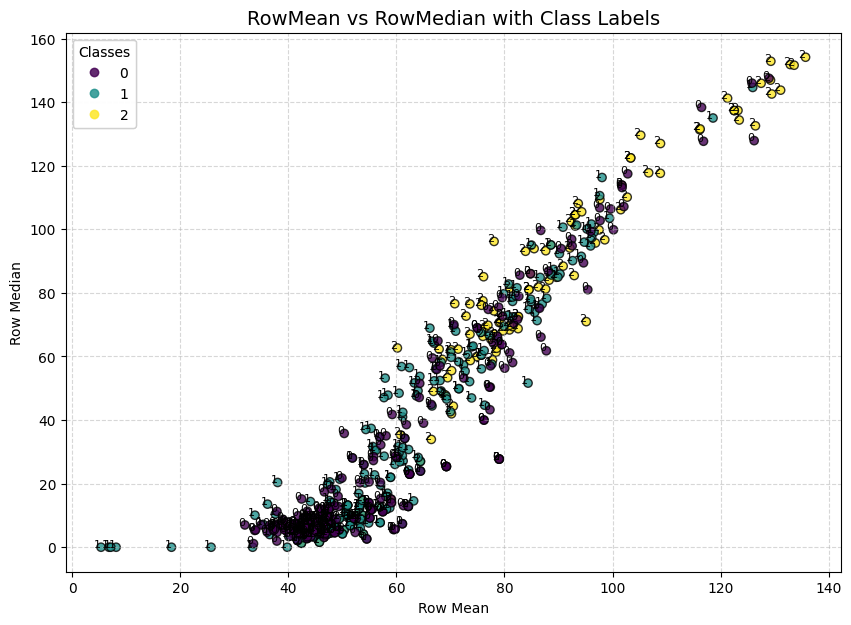

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("trinagle_features_78_stable_updated.csv")

# # Generate triangle column names dynamically
# triangle_cols = [f"triangle{i}_mean" for i in range(1, 79)]

# # Compute row-wise mean & median
# df["RowMean"] = df[triangle_cols].mean(axis=1)
# df["RowMedian"] = df[triangle_cols].median(axis=1)

# Assuming labels column is named "label" (0,1,2)
label_col = "label"

# Scatter plot, coloring by class
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df["row_mean"], df["row_median"], 
    c=df[label_col], cmap="viridis", alpha=0.8, edgecolor="k"
)

# Add labels for each point
for i in range(len(df)):
    plt.text(
        df["row_mean"].iloc[i],
        df["row_median"].iloc[i],
        str(df[label_col].iloc[i]),   # show the class label
        fontsize=8,
        ha="right"
    )

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.title("RowMean vs RowMedian with Class Labels", fontsize=14)
plt.xlabel("Row Mean")
plt.ylabel("Row Median")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [10]:
df = pd.read_csv("triangle_features_78_stable.csv")
X = df.drop("label",axis=1).values
y= df["label"].values
df.shape

(616, 391)

In [11]:
import numpy as np

print("Any NaN in X? ", np.isnan(X).any())
print("How many NaNs? ", np.isnan(X).sum())

Any NaN in X?  False
How many NaNs?  0


## Machine Learning

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object
scaler = StandardScaler()

# Fit only on training data, then transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler (already fitted) to transform test data
X_test = scaler.transform(X_test)


## SVM - kernel = linear

In [1]:
# ============================================================
# 🔹 Grid Search for Best SVM Hyperparameters with rbf
# ============================================================
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Define pipeline
# -----------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),       # always scale features before SVM
    ("svc", SVC(random_state=42))       # we will tune hyperparameters
])

# -----------------------------
# 2. Define parameter grid
#    (you can expand/shrink these ranges)
# -----------------------------
param_grid = {
    "svc__C": [0.01, 0.1, 1, 10, 100,1000],
    "svc__gamma": [0.01, 0.1, 1, "scale", "auto"],              # only used for poly, ignored otherwise
    "svc__kernel": ["linear"],
    "svc__class_weight": [None, "balanced"],
    "svc__decision_function_shape": ["ovo", "ovr"]
}

# -----------------------------
# 3. Run GridSearchCV
# -----------------------------
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_macro",   # optimize for all classes equally
    cv=5,
    n_jobs=-1,
    verbose=3
)

grid.fit(X_train, y_train)

# -----------------------------
# 4. Print best parameters & score
# -----------------------------
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Macro F1 Score:", grid.best_score_)

# -----------------------------
# 5. Evaluate on test set
# -----------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


NameError: name 'X_train' is not defined

In [ ]:
# You can try different kernels: 'linear', 'rbf', 'poly'
svm_model = SVC(kernel="linear", C=0.01, gamma=0.01, decision_function_shape="ovo",random_state = 42)
svm_model.fit(X_train, y_train)

,C,0.01
,kernel,'linear'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


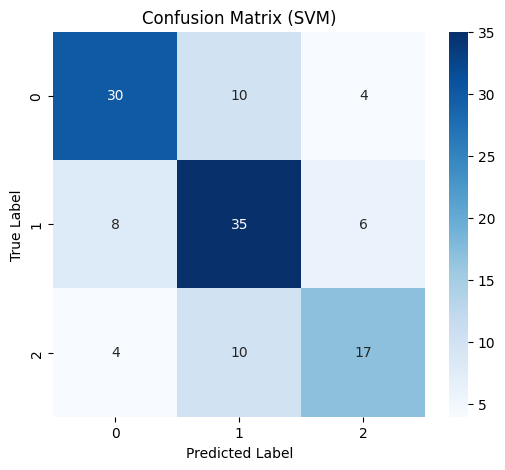


Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.68      0.70        44
           1       0.64      0.71      0.67        49
           2       0.63      0.55      0.59        31

    accuracy                           0.66       124
   macro avg       0.66      0.65      0.65       124
weighted avg       0.66      0.66      0.66       124

Training Accuracy: 0.8048780487804879
Test Accuracy: 0.6612903225806451


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# After predicting
y_pred = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)   # class names from your dataset

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SVM)")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
# --- 9. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, svm_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

## SVM - kernal = sigmoid 

In [64]:
# ============================================================
# 🔹 Grid Search for Best SVM Hyperparameters with rbf
# ============================================================
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Define pipeline
# -----------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),       # always scale features before SVM
    ("svc", SVC(random_state=42))       # we will tune hyperparameters
])

# -----------------------------
# 2. Define parameter grid
#    (you can expand/shrink these ranges)
# -----------------------------
param_grid = {
    "svc__C": [0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.01, 0.1, 1, "scale", "auto"],              # only used for poly, ignored otherwise
    "svc__kernel": ["sigmoid"],
    "svc__class_weight": [None, "balanced"],
    "svc__decision_function_shape": ["ovo", "ovr"]
}

# -----------------------------
# 3. Run GridSearchCV
# -----------------------------
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_macro",   # optimize for all classes equally
    cv=5,
    n_jobs=-1,
    verbose=3
)

grid.fit(X_train, y_train)

# -----------------------------
# 4. Print best parameters & score
# -----------------------------
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Macro F1 Score:", grid.best_score_)

# -----------------------------
# 5. Evaluate on test set
# -----------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=sigmoid;, score=0.352 total time=   0.1s
[CV 3/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=sigmoid;, score=0.233 total time=   0.1s
[CV 4/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=sigmoid;, score=0.403 total time=   0.1s
[CV 5/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=sigmoid;, score=0.382 total time=   0.1s
[CV 3/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=1, svc__kernel=sigmoid;, score=0.451 total time=   0.1s
[CV 4/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=1, svc__kernel=sigmoid;, score=0.393 total time=   0.1s
[CV 5/5] END svc__C

In [65]:
# You can try different kernels: 'linear', 'rbf', 'poly'
svm_model = SVC(kernel="sigmoid", C=1, gamma='scale', decision_function_shape="ovo",random_state = 42)
svm_model.fit(X_train, y_train)

,C,1
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


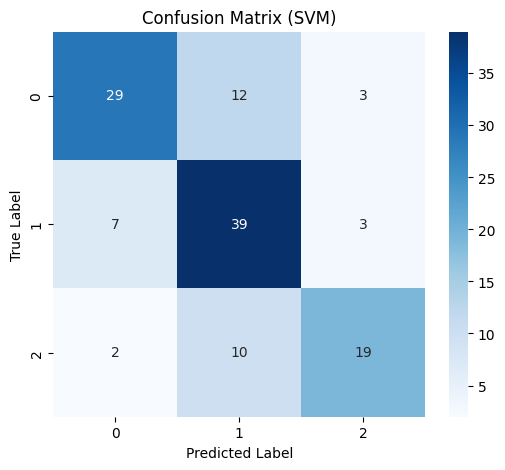


Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.66      0.71        44
           1       0.64      0.80      0.71        49
           2       0.76      0.61      0.68        31

    accuracy                           0.70       124
   macro avg       0.72      0.69      0.70       124
weighted avg       0.71      0.70      0.70       124

Training Accuracy: 0.6869918699186992
Test Accuracy: 0.7016129032258065


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# After predicting
y_pred = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)   # class names from your dataset

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SVM)")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
# --- 9. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, svm_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

## SVM - kernal = polynomial

In [67]:
# ============================================================
# 🔹 Grid Search for Best SVM Hyperparameters with rbf
# ============================================================
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Define pipeline
# -----------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),       # always scale features before SVM
    ("svc", SVC(random_state=42))       # we will tune hyperparameters
])

# -----------------------------
# 2. Define parameter grid
#    (you can expand/shrink these ranges)
# -----------------------------
param_grid = {
    "svc__C": [0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.01, 0.1, 1, "scale", "auto"],              # only used for poly, ignored otherwise
    "svc__kernel": ["poly"],
    "svc__class_weight": [None, "balanced"],
    "svc__decision_function_shape": ["ovo", "ovr"]
}

# -----------------------------
# 3. Run GridSearchCV
# -----------------------------
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_macro",   # optimize for all classes equally
    cv=5,
    n_jobs=-1,
    verbose=3
)

grid.fit(X_train, y_train)

# -----------------------------
# 4. Print best parameters & score
# -----------------------------
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Macro F1 Score:", grid.best_score_)

# -----------------------------
# 5. Evaluate on test set
# -----------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 2/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=poly;, score=0.563 total time=   0.0s
[CV 4/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=poly;, score=0.500 total time=   0.1s
[CV 3/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=poly;, score=0.501 total time=   0.1s
[CV 5/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=poly;, score=0.481 total time=   0.1s
[CV 3/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=1, svc__kernel=poly;, score=0.525 total time=   0.1s
[CV 4/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=1, svc__kernel=poly;, score=0.538 total time=   0.1s
[CV 1/5] END svc__C=0.01, svc__class_

In [69]:
# You can try different kernels: 'linear', 'rbf', 'poly'
svm_model = SVC(kernel="poly", C=0.1, gamma=0.01, decision_function_shape="ovo",random_state = 42,class_weight="balanced")
svm_model.fit(X_train, y_train)

,C,0.1
,kernel,'poly'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


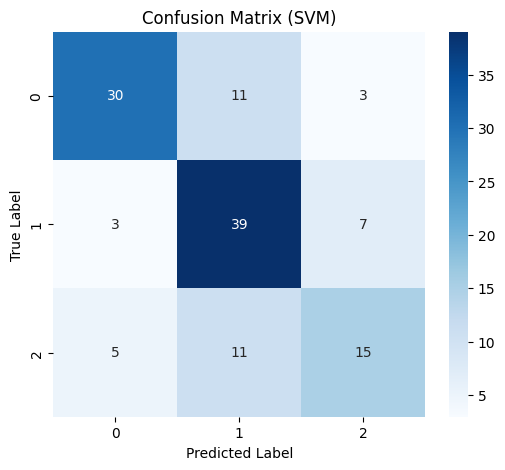


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        44
           1       0.64      0.80      0.71        49
           2       0.60      0.48      0.54        31

    accuracy                           0.68       124
   macro avg       0.68      0.65      0.66       124
weighted avg       0.68      0.68      0.67       124

Training Accuracy: 0.8658536585365854
Test Accuracy: 0.6774193548387096


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# After predicting
y_pred = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)   # class names from your dataset

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SVM)")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
# --- 9. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, svm_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

## SVM - kernal = rbf

In [ ]:
# ============================================================
# 🔹 Grid Search for Best SVM Hyperparameters with rbf
# ============================================================
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1. Define pipeline
# -----------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),       # always scale features before SVM
    ("svc", SVC(random_state=42))       # we will tune hyperparameters
])

# -----------------------------
# 2. Define parameter grid
#    (you can expand/shrink these ranges)
# -----------------------------
param_grid = {
    "svc__C": [0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.01, 0.1, 1, "scale", "auto"],              # only used for poly, ignored otherwise
    "svc__kernel": ["rbf"],
    "svc__class_weight": [None, "balanced"],
    "svc__decision_function_shape": ["ovo", "ovr"]
}

# -----------------------------
# 3. Run GridSearchCV
# -----------------------------
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_macro",   # optimize for all classes equally
    cv=5,
    n_jobs=-1,
    verbose=3
)

grid.fit(X_train, y_train)

# -----------------------------
# 4. Print best parameters & score
# -----------------------------
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Macro F1 Score:", grid.best_score_)

# -----------------------------
# 5. Evaluate on test set
# -----------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[CV 3/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=rbf;, score=0.190 total time=   0.1s
[CV 3/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=1, svc__kernel=rbf;, score=0.190 total time=   0.1s
[CV 1/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.1, svc__kernel=rbf;, score=0.185 total time=   0.1s
[CV 4/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=1, svc__kernel=rbf;, score=0.190 total time=   0.1s
[CV 5/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.01, svc__kernel=rbf;, score=0.186 total time=   0.1s
[CV 4/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.1, svc__kernel=rbf;, score=0.190 total time=   0.1s
[CV 3/5] END svc__C=0.01, svc__class_weight=None, svc__decision_function_shape=ovo, svc__gamma=0.1, svc__ker

In [57]:
# You can try different kernels: 'linear', 'rbf', 'poly'
svm_model = SVC(kernel="rbf", C=1, gamma='scale', decision_function_shape="ovo",random_state = 42)
svm_model.fit(X_train, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


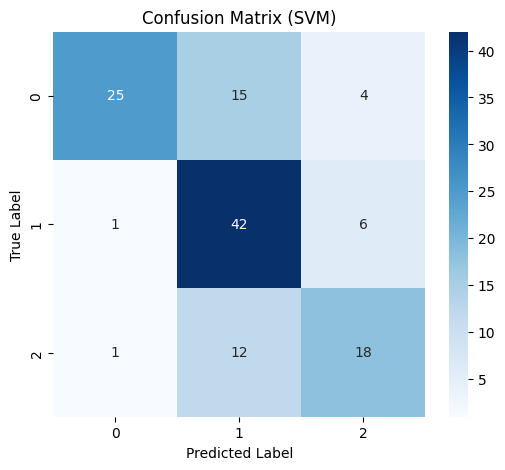


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.57      0.70        44
           1       0.61      0.86      0.71        49
           2       0.64      0.58      0.61        31

    accuracy                           0.69       124
   macro avg       0.73      0.67      0.68       124
weighted avg       0.73      0.69      0.68       124

Training Accuracy: 0.758130081300813
Test Accuracy: 0.6854838709677419


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# After predicting
y_pred = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)   # class names from your dataset

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SVM)")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
# --- 9. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, svm_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

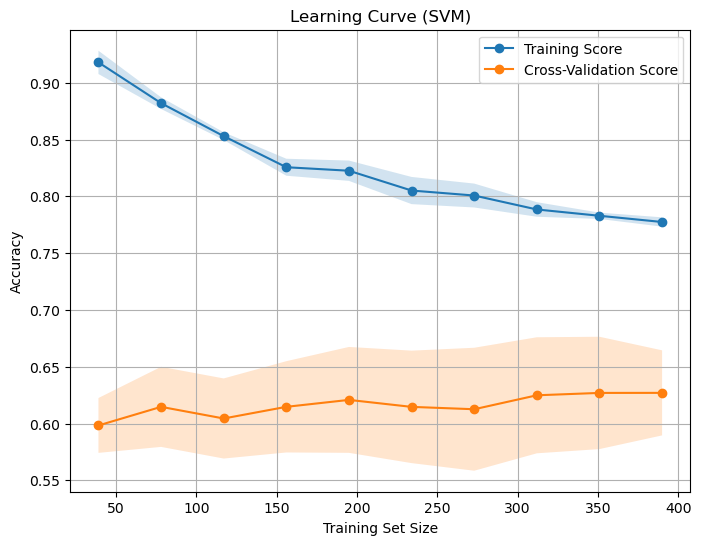

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train,
    cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy", n_jobs=-1
)

# Mean ± std
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (SVM)")
plt.legend()
plt.grid(True)
plt.show()


## KNeighborsClassifier

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [20]:
df = pd.read_csv("triangle_features_78_stable.csv")
X = df.drop("label",axis=1).values
y= df["label"].values
X[np.isnan(X)] = 0
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
knn = KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2)  # Euclidean distance
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
y_pred = knn.predict(X_test)

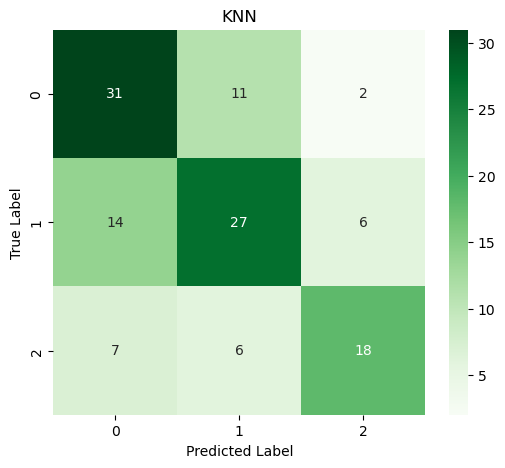


Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.70      0.65        44
           1       0.61      0.57      0.59        47
           2       0.69      0.58      0.63        31

    accuracy                           0.62       122
   macro avg       0.63      0.62      0.62       122
weighted avg       0.63      0.62      0.62       122

Training Accuracy: 0.6004098360655737
Test Accuracy: 0.6229508196721312


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# After predicting
y_pred = knn.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)   # class names from your dataset

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
# --- 9. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, knn.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


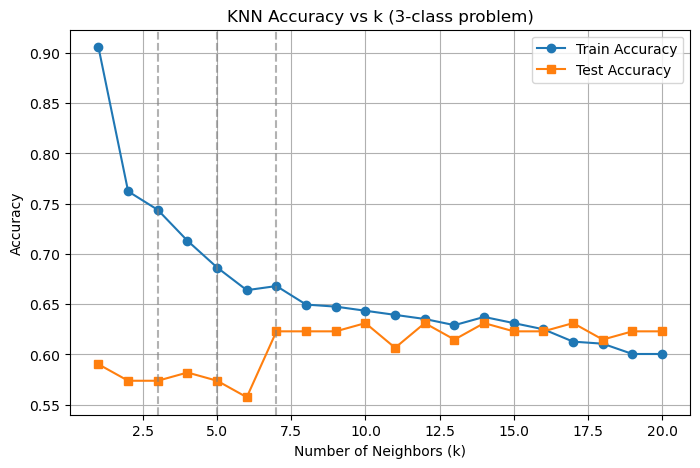

In [36]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []
k_values = range(1, 21)  # test k=1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, knn.predict(X_train)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test)))

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, marker='o', label="Train Accuracy")
plt.plot(k_values, test_acc, marker='s', label="Test Accuracy")
plt.axvline(x=3, color="gray", linestyle="--", alpha=0.6)  # mark k=3
plt.axvline(x=5, color="gray", linestyle="--", alpha=0.6)  # mark k=5
plt.axvline(x=7, color="gray", linestyle="--", alpha=0.6)  # mark k=7
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k (3-class problem)")
plt.legend()
plt.grid(True)
plt.show()


## RandomForest

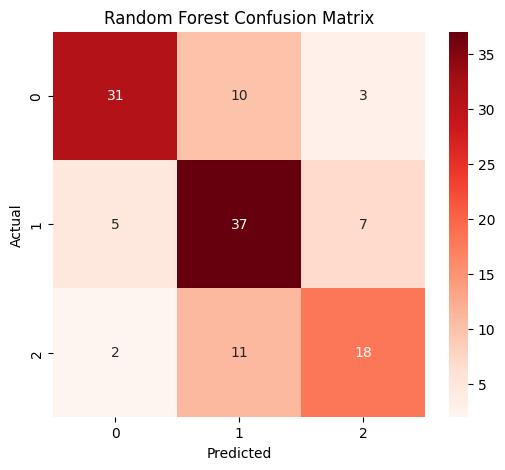


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        44
           1       0.64      0.76      0.69        49
           2       0.64      0.58      0.61        31

    accuracy                           0.69       124
   macro avg       0.70      0.68      0.69       124
weighted avg       0.70      0.69      0.69       124

Training Accuracy: 0.8882113821138211
Test Accuracy: 0.6935483870967742


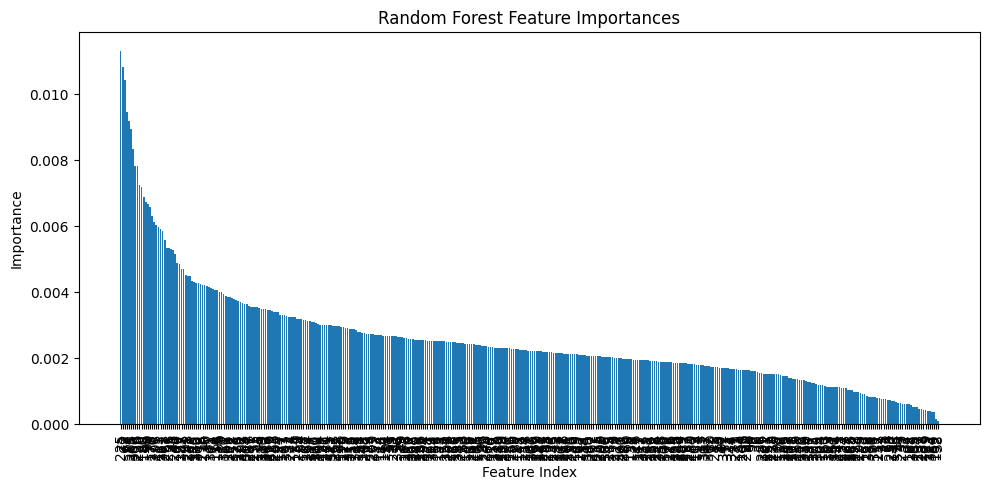

In [25]:
from sklearn.ensemble import RandomForestClassifier

# --- 5. Train Random Forest ---
rf = RandomForestClassifier(
    n_estimators=200,    # number of trees
    max_depth=None,      # let trees expand fully
    random_state=42,
    n_jobs=-1            # use all CPU cores
)
rf.fit(X_train, y_train)

# --- 6. Predictions ---
y_pred = rf.predict(X_test)

# --- 7. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# --- 8. Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# --- 9. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
# --- 9. Feature Importance Plot ---
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), indices, rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

## Logistic Regression

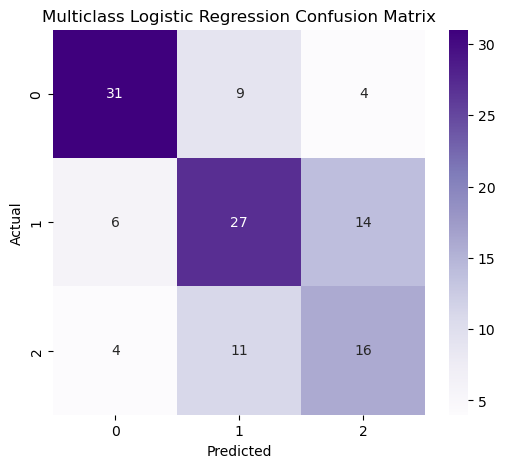


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        44
           1       0.57      0.57      0.57        47
           2       0.47      0.52      0.49        31

    accuracy                           0.61       122
   macro avg       0.60      0.60      0.60       122
weighted avg       0.61      0.61      0.61       122

Training Accuracy: 0.9036885245901639
Test Accuracy: 0.6065573770491803


In [31]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
logreg = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        # multi_class="multinomial",
        solver="saga",
        max_iter=2000,   # allow more iterations
        random_state=42
    )
)
# --- 5. Multiclass Logistic Regression ---
#  # use softmax for multiclass     
logreg.fit(X_train, y_train)

# --- 6. Predictions ---
y_pred = logreg.predict(X_test)

# --- 7. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiclass Logistic Regression Confusion Matrix")
plt.show()

# --- 8. Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 9. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, logreg.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

## DecisionTree

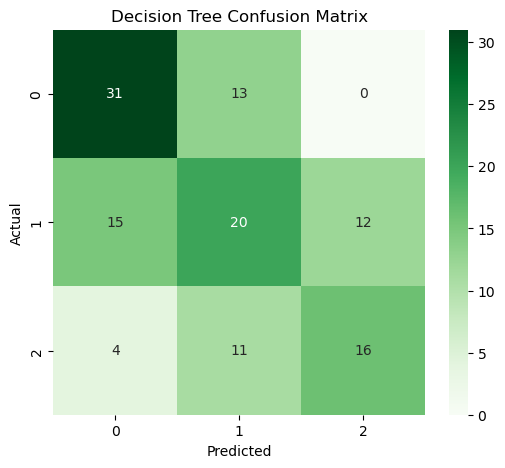


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66        44
           1       0.45      0.43      0.44        47
           2       0.57      0.52      0.54        31

    accuracy                           0.55       122
   macro avg       0.55      0.55      0.55       122
weighted avg       0.54      0.55      0.55       122

Training Accuracy: 0.8790983606557377
Test Accuracy: 0.5491803278688525


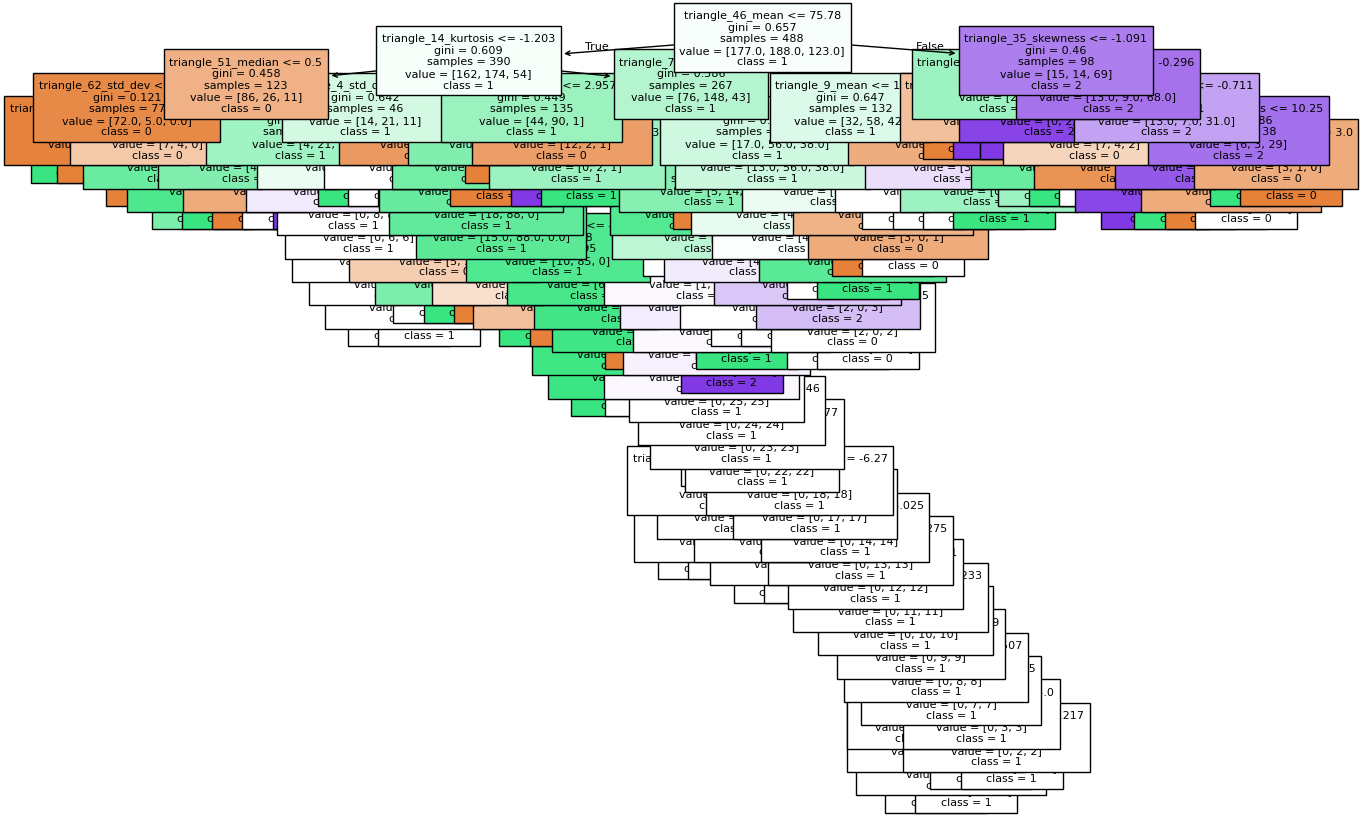

In [37]:

from sklearn.tree import DecisionTreeClassifier, plot_tree



# --- 3. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
dt = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=None,     # you can tune this (e.g., 5, 10) to prevent overfitting
    random_state=42
)
dt.fit(X_train, y_train)

# --- 6. Predictions ---
y_pred = dt.predict(X_test)

# --- 7. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# --- 8. Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 9. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# --- 10. Plot the Tree (small datasets only, large trees may look messy) ---
plt.figure(figsize=(16,10))
plot_tree(dt, filled=True, feature_names=df.drop("label", axis=1).columns,
          class_names=[str(c) for c in np.unique(y)], fontsize=8)
plt.show()

## Gradient Boosting

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


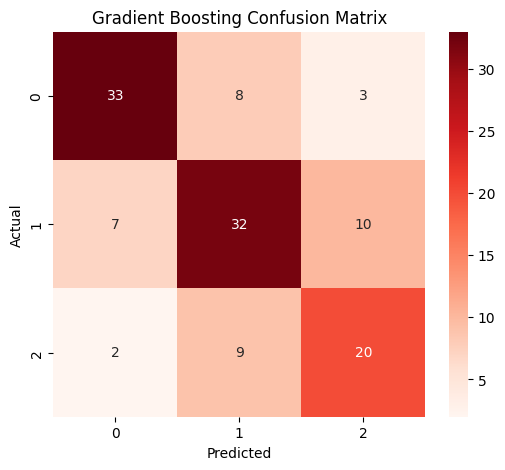


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        44
           1       0.65      0.65      0.65        49
           2       0.61      0.65      0.62        31

    accuracy                           0.69       124
   macro avg       0.68      0.68      0.68       124
weighted avg       0.69      0.69      0.69       124

Training Accuracy: 0.8882113821138211
Test Accuracy: 0.6854838709677419


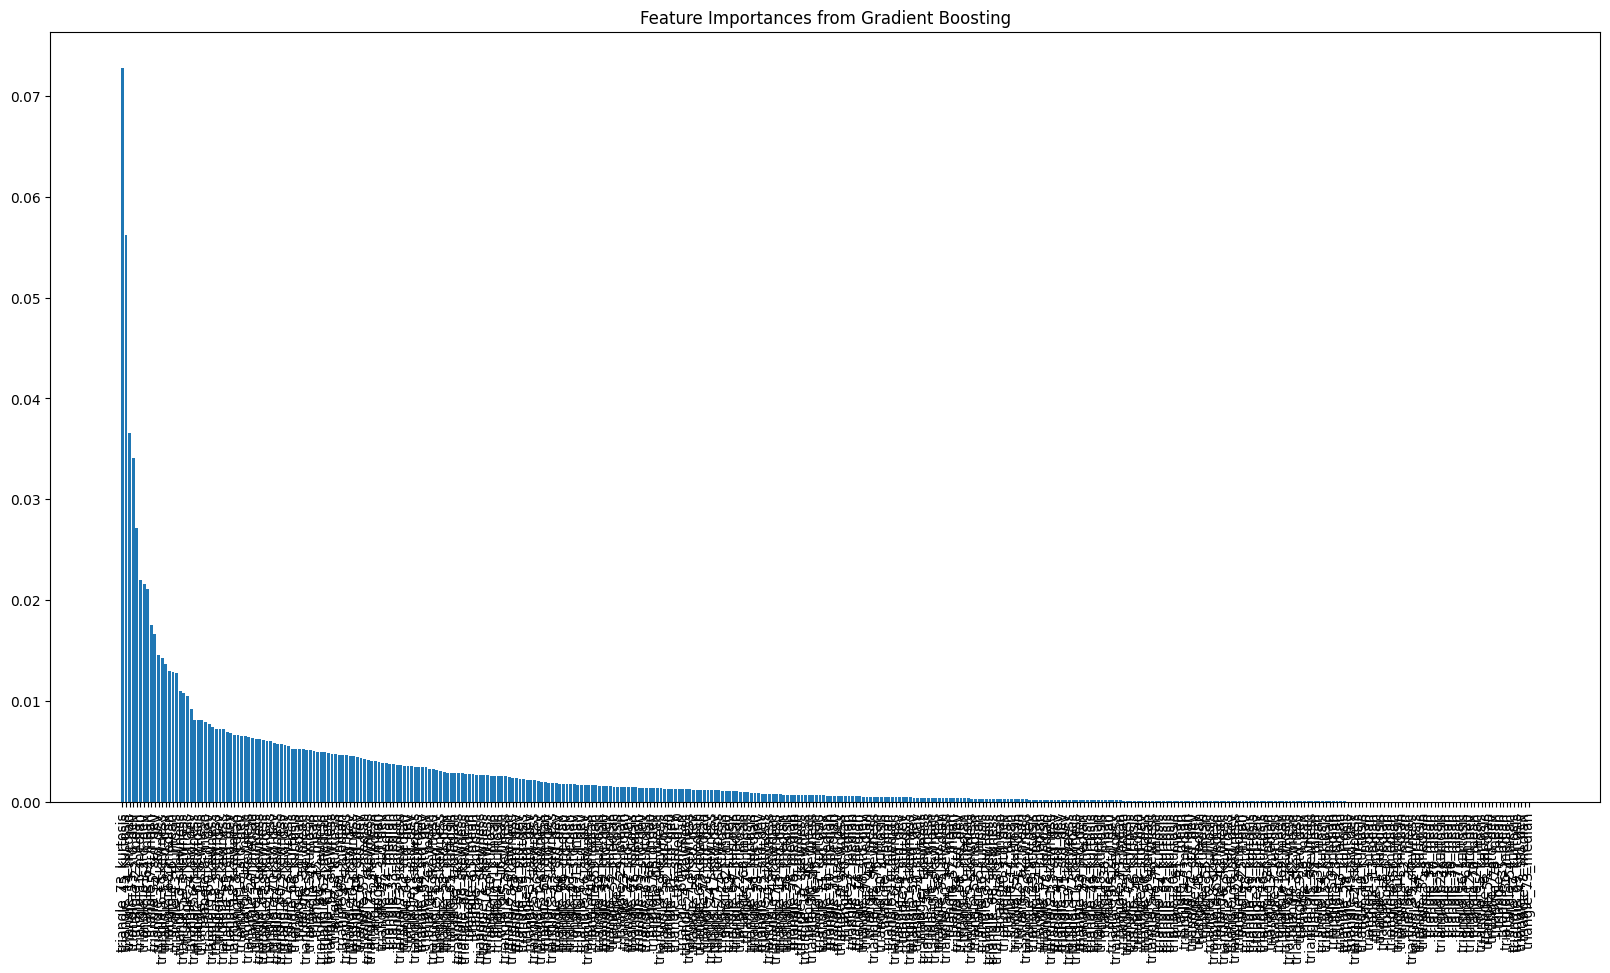

In [24]:

from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Gradient Boosting Classifier ---
gb = GradientBoostingClassifier(
    n_estimators=200,     # number of trees
    learning_rate=0.1,    # step size shrinkage
    max_depth=3,          # depth of each tree
    random_state=42
)
gb.fit(X_train, y_train)

# --- 5. Predictions ---
y_pred = gb.predict(X_test)

# --- 6. Confusion Matrix Heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# --- 7. Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 8. Accuracy ---
print("Training Accuracy:", accuracy_score(y_train, gb.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# --- 9. Feature Importance ---
plt.figure(figsize=(20,10))
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), df.drop("label", axis=1).columns[indices], rotation=90)
plt.title("Feature Importances from Gradient Boosting")
plt.show()


In [44]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 0.01, 0.001],
#     'kernel': ['linear', 'rbf', 'poly']
# }

# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
# grid.fit(X_train, y_train)

# print("Best Parameters:", grid.best_params_)


## Deep Learning

## VGG16-01

In [1]:
pip install tensorflow[and-cuda]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

2025-09-16 00:39:58.626047: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-16 00:39:59.450108: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-16 00:40:03.598816: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16 # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense,Flatten, Dropout,Conv2D,MaxPooling2D,ZeroPadding2D,GlobalAveragePooling2D,Activation # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [5]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPU devices:", tf.config.list_physical_devices('GPU'))

TF version: 2.20.0
Built with CUDA: True
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
#gpu detection check
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
input_rows, input_cols = 224,224

vgg16 = VGG16(weights = "imagenet",include_top = False,input_shape = (224,224,3))

for layer in vgg16.layers:
    layer.trainable = False

for (i,layer) in enumerate(vgg16.layers):
    print(str(i)+" "+layer.__class__.__name__,layer.trainable)

I0000 00:00:1757801135.875084    5613 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4143 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 61s 1us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
 def lw(bottom_model,num_class):
    '''create last layer class'''
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_class,activation='softmax')(top_model)
    return top_model

In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
# ============================================================
# 🖼️ Data Generators
# ============================================================
dataset_path = "dataset"  # must contain subfolders: Normal, Osteoporosis, Osteopenia
img_size = (224, 224)  # VGG16 input size
batch_size = 32
epochs = 100  # initial training, can increase later
num_classes = 3  # Normal, Osteoporosis, Osteopenia
datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values
    validation_split=0.2,    # 80% train, 20% validation
    rotation_range=20,       # data augmentation
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 504 images belonging to 3 classes.
Found 125 images belonging to 3 classes.


In [15]:
history = model.fit(train_gen,validation_data=val_gen,verbose=1,epochs=50)

/home/sayan/miniconda3/envs/myenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2025-09-14 03:38:58.956911: I external/local_xla/xla/service/service.cc:163] XLA service 0x780744002350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-14 03:38:58.956929: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-09-14 03:38:58.991023: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-14 03:38:59.314917: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300
2025-09-14 03:38:59.342849: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-14 03:38:59.

 1/16 ━━━━━━━━━━━━━━━━━━━━ 5:14 21s/step - accuracy: 0.4688 - loss: 1.1188

I0000 00:00:1757801358.136694    5723 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 3/16 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step - accuracy: 0.3976 - loss: 1.4534

2025-09-14 03:39:21.020468: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1003', 4 bytes spill stores, 4 bytes spill loads

2025-09-14 03:39:23.755148: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.79GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4013 - loss: 1.3234

2025-09-14 03:39:46.344867: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.94GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


16/16 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.4028 - loss: 1.1962 - val_accuracy: 0.3920 - val_loss: 1.0388
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 705ms/step - accuracy: 0.4583 - loss: 1.0248 - val_accuracy: 0.4400 - val_loss: 1.0685
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 728ms/step - accuracy: 0.5536 - loss: 0.9494 - val_accuracy: 0.5920 - val_loss: 0.8678
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 713ms/step - accuracy: 0.6091 - loss: 0.8637 - val_accuracy: 0.6480 - val_loss: 0.7605
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 710ms/step - accuracy: 0.5952 - loss: 0.8314 - val_accuracy: 0.5920 - val_loss: 0.8498
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 709ms/step - accuracy: 0.5952 - loss: 0.8407 - val_accuracy: 0.6480 - val_loss: 0.7340
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 712ms/step - accuracy: 0.6250 - loss: 0.8272 - val_accuracy: 0.6640 - val_loss: 0.7358
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 713ms/step - accuracy: 0.6349 - loss: 0.7986 - val_accuracy: 0.6320 -

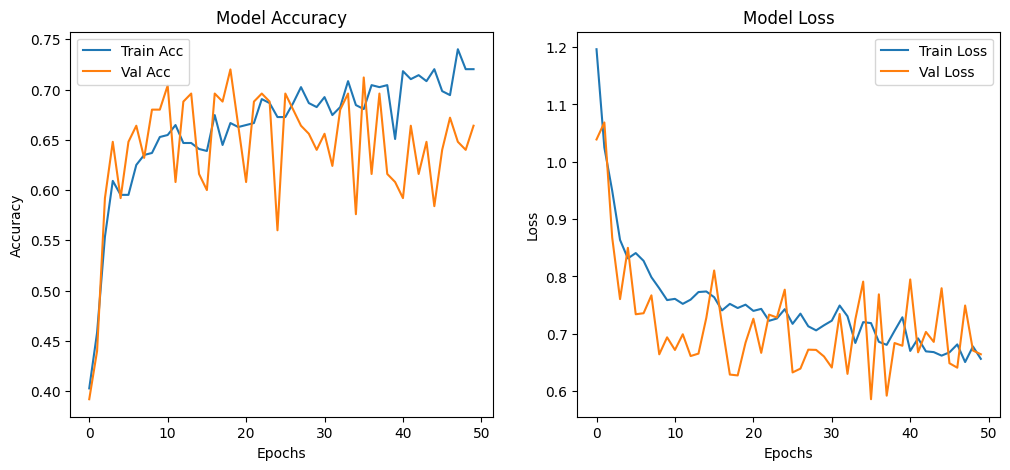

In [16]:
# ============================================================
# 📊 Plot Training History
# ============================================================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 682ms/step
📌 Overall Metrics:
Accuracy       : 0.3840
Precision (macro) : 0.4375
Precision (weighted): 0.4240
Recall (macro)    : 0.3596
Recall (weighted) : 0.3840
F1-score (macro)  : 0.3571
F1-score (weighted): 0.3714

📊 Classification Report (per class):

              precision    recall  f1-score   support

      Normal       0.33      0.49      0.39        45
  Osteopenia       0.56      0.16      0.25        31
Osteoporosis       0.43      0.43      0.43        49

    accuracy                           0.38       125
   macro avg       0.44      0.36      0.36       125
weighted avg       0.42      0.38      0.37       125



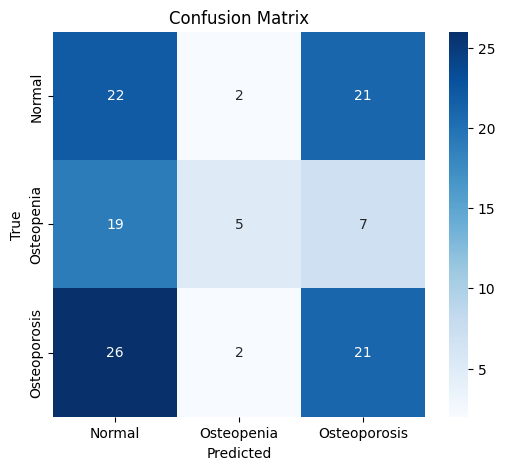

In [17]:
# ============================================================
# 📈 Evaluate Model: Accuracy, Precision, Recall, F1, Confusion Matrix
# ============================================================
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get class labels
class_names = list(train_gen.class_indices.keys())

# Predictions
y_true = val_gen.classes
y_pred_proba = model.predict(val_gen)
y_pred = np.argmax(y_pred_proba, axis=1)

# Print Metrics
print("📌 Overall Metrics:")
print(f"Accuracy       : {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro) : {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"Precision (weighted): {precision_score(y_true, y_pred, average='weighted'):.4f}")
print(f"Recall (macro)    : {recall_score(y_true, y_pred, average='macro'):.4f}")
print(f"Recall (weighted) : {recall_score(y_true, y_pred, average='weighted'):.4f}")
print(f"F1-score (macro)  : {f1_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1-score (weighted): {f1_score(y_true, y_pred, average='weighted'):.4f}")

# Per-class classification report
print("\n📊 Classification Report (per class):\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## VGG16-02

In [ ]:
# ============================================================
# 📚 Imports
# ============================================================
import tensorflow as tf
from tensorflow.keras.applications import VGG16 # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
import matplotlib.pyplot as plt

# ============================================================
# 📂 Dataset Path and Parameters
# ============================================================
dataset_path = "dataset"  # must contain subfolders: Normal, Osteoporosis, Osteopenia
img_size = (224, 224)  # VGG16 input size
batch_size = 32
epochs = 100  # initial training, can increase later
num_classes = 3  # Normal, Osteoporosis, Osteopenia


In [5]:
# ============================================================
# 🖼️ Data Generators
# ============================================================
datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values
    validation_split=0.2,    # 80% train, 20% validation
    rotation_range=20,       # data augmentation
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 499 images belonging to 3 classes.
Found 124 images belonging to 3 classes.


In [6]:
# ============================================================
# 🔥 Build VGG16 Model
# ============================================================
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze base layers (keep pretrained ImageNet features)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")  # 3 classes
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# View model summary
model.summary()


2025-09-11 17:59:23.357136: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-09-11 17:59:23.357156: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: sayan
2025-09-11 17:59:23.357160: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: sayan
2025-09-11 17:59:23.357320: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 575.64.3
2025-09-11 17:59:23.357334: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 575.64.3
2025-09-11 17:59:23.357336: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 575.64.3


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
# ============================================================
# 🏋️ Train the Model
# ============================================================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)
30

/home/sayan/miniconda3/envs/Env_1/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4509 - loss: 1.1493 - val_accuracy: 0.6290 - val_loss: 0.7907
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5812 - loss: 0.8993 - val_accuracy: 0.6935 - val_loss: 0.7332
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5972 - loss: 0.8564 - val_accuracy: 0.6774 - val_loss: 0.7641
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6433 - loss: 0.8217 - val_accuracy: 0.6774 - val_loss: 0.7291
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6192 - loss: 0.8054 - val_accuracy: 0.6855 - val_loss: 0.7174
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6453 - loss: 0.8117 - val_accuracy: 0.6855 - val_loss: 0.7315
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6333 - loss: 0.8091 - val_accuracy: 0.6613 - val_loss: 0.7652
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6313 - loss: 0.8002 - val_accuracy: 0.6694 - v

30

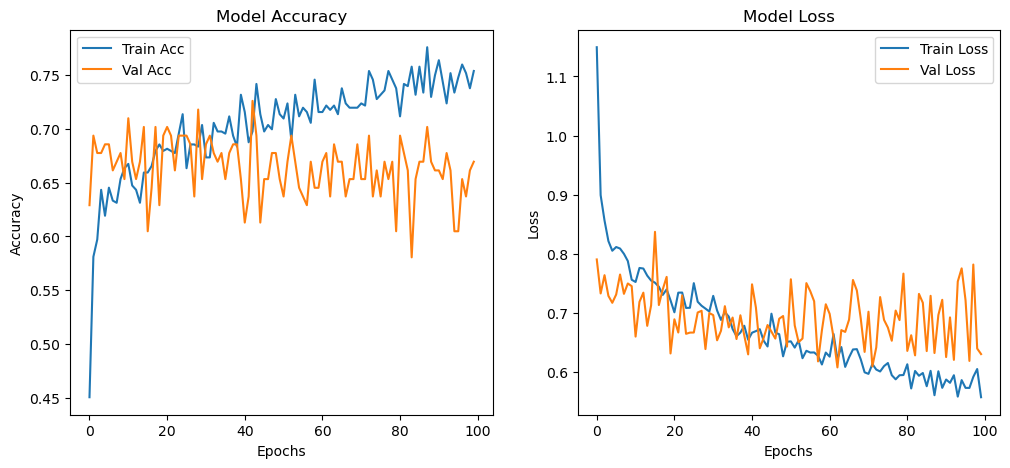

In [8]:
# ============================================================
# 📊 Plot Training History
# ============================================================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
📌 Overall Metrics:
Accuracy       : 0.2984
Precision (macro) : 0.3352
Precision (weighted): 0.3244
Recall (macro)    : 0.2749
Recall (weighted) : 0.2984
F1-score (macro)  : 0.2672
F1-score (weighted): 0.2818

📊 Classification Report (per class):

              precision    recall  f1-score   support

      Normal       0.25      0.31      0.28        45
  Osteopenia       0.43      0.10      0.16        31
Osteoporosis       0.32      0.42      0.36        48

    accuracy                           0.30       124
   macro avg       0.34      0.27      0.27       124
weighted avg       0.32      0.30      0.28       124



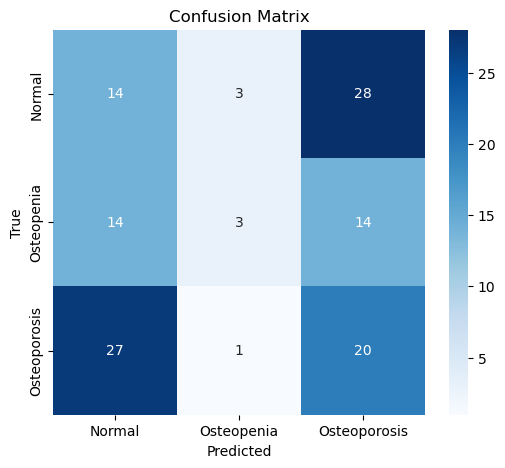

In [ ]:
# ============================================================
# 📈 Evaluate Model: Accuracy, Precision, Recall, F1, Confusion Matrix
# ============================================================
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get class labels
class_names = list(train_gen.class_indices.keys())

# Predictions
y_true = val_gen.classes
y_pred_proba = model.predict(val_gen)
y_pred = np.argmax(y_pred_proba, axis=1)

# Print Metrics
print("📌 Overall Metrics:")
print(f"Accuracy       : {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro) : {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"Precision (weighted): {precision_score(y_true, y_pred, average='weighted'):.4f}")
print(f"Recall (macro)    : {recall_score(y_true, y_pred, average='macro'):.4f}")
print(f"Recall (weighted) : {recall_score(y_true, y_pred, average='weighted'):.4f}")
print(f"F1-score (macro)  : {f1_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1-score (weighted): {f1_score(y_true, y_pred, average='weighted'):.4f}")

# Per-class classification report
print("\n📊 Classification Report (per class):\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()